In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

In [5]:
df=pd.read_csv("C:/Users/CHITRAK/Desktop/GitHub/Housing/test.csv")
print(df)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fenc

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [8]:
df.drop('LotFrontage', inplace=True, axis=1)

In [9]:
df.drop('Alley', inplace=True, axis=1)

In [10]:
df.drop('MasVnrArea', inplace=True, axis=1)

In [11]:
df.drop('BsmtQual', inplace=True, axis=1)

In [12]:
df.drop('BsmtCond', inplace=True, axis=1)

In [13]:
df.drop('BsmtExposure', inplace=True, axis=1)

In [14]:
df.drop('BsmtFinType1', inplace=True, axis=1)

In [15]:
df.drop('BsmtFinType2', inplace=True, axis=1)

In [16]:
df.drop('FireplaceQu', inplace=True, axis=1)

In [17]:
df.drop('GarageType', inplace=True, axis=1)

In [18]:
df.drop('GarageYrBlt', inplace=True, axis=1)

In [19]:
df.drop('GarageFinish', inplace=True, axis=1)

In [20]:
df.drop('GarageQual', inplace=True, axis=1)

In [21]:
df.drop('GarageCond', inplace=True, axis=1)

In [22]:
df.drop('PoolQC', inplace=True, axis=1)

In [23]:
df.drop('Fence', inplace=True, axis=1)

In [24]:
df.drop('MiscFeature', inplace=True, axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             292 non-null    int64 
 1   MSSubClass     292 non-null    int64 
 2   MSZoning       292 non-null    object
 3   LotArea        292 non-null    int64 
 4   Street         292 non-null    object
 5   LotShape       292 non-null    object
 6   LandContour    292 non-null    object
 7   Utilities      292 non-null    object
 8   LotConfig      292 non-null    object
 9   LandSlope      292 non-null    object
 10  Neighborhood   292 non-null    object
 11  Condition1     292 non-null    object
 12  Condition2     292 non-null    object
 13  BldgType       292 non-null    object
 14  HouseStyle     292 non-null    object
 15  OverallQual    292 non-null    int64 
 16  OverallCond    292 non-null    int64 
 17  YearBuilt      292 non-null    int64 
 18  YearRemodAdd   292 non-null   

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,...,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,18,0,0,0,0,0,1,2008,WD,Normal


In [27]:
df.shape

(292, 63)

In [28]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,10645.143836,6.078767,5.493151,1972.616438,1985.294521,439.294521,46.157534,557.315068,...,457.458904,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,28.184932,6.232877,2007.859589
std,442.565228,43.780649,13330.669795,1.356147,1.063267,30.447016,20.105792,429.559675,152.467119,411.043768,...,210.785591,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,224.036218,2.774556,1.322867
min,6.000000,20.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,255.000000,...,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,369.500000,0.000000,487.000000,...,467.500000,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,700.500000,0.000000,780.000000,...,569.750000,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1767.000000,1085.000000,1935.000000,...,1052.000000,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,3500.000000,12.000000,2010.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBath'}>,
 

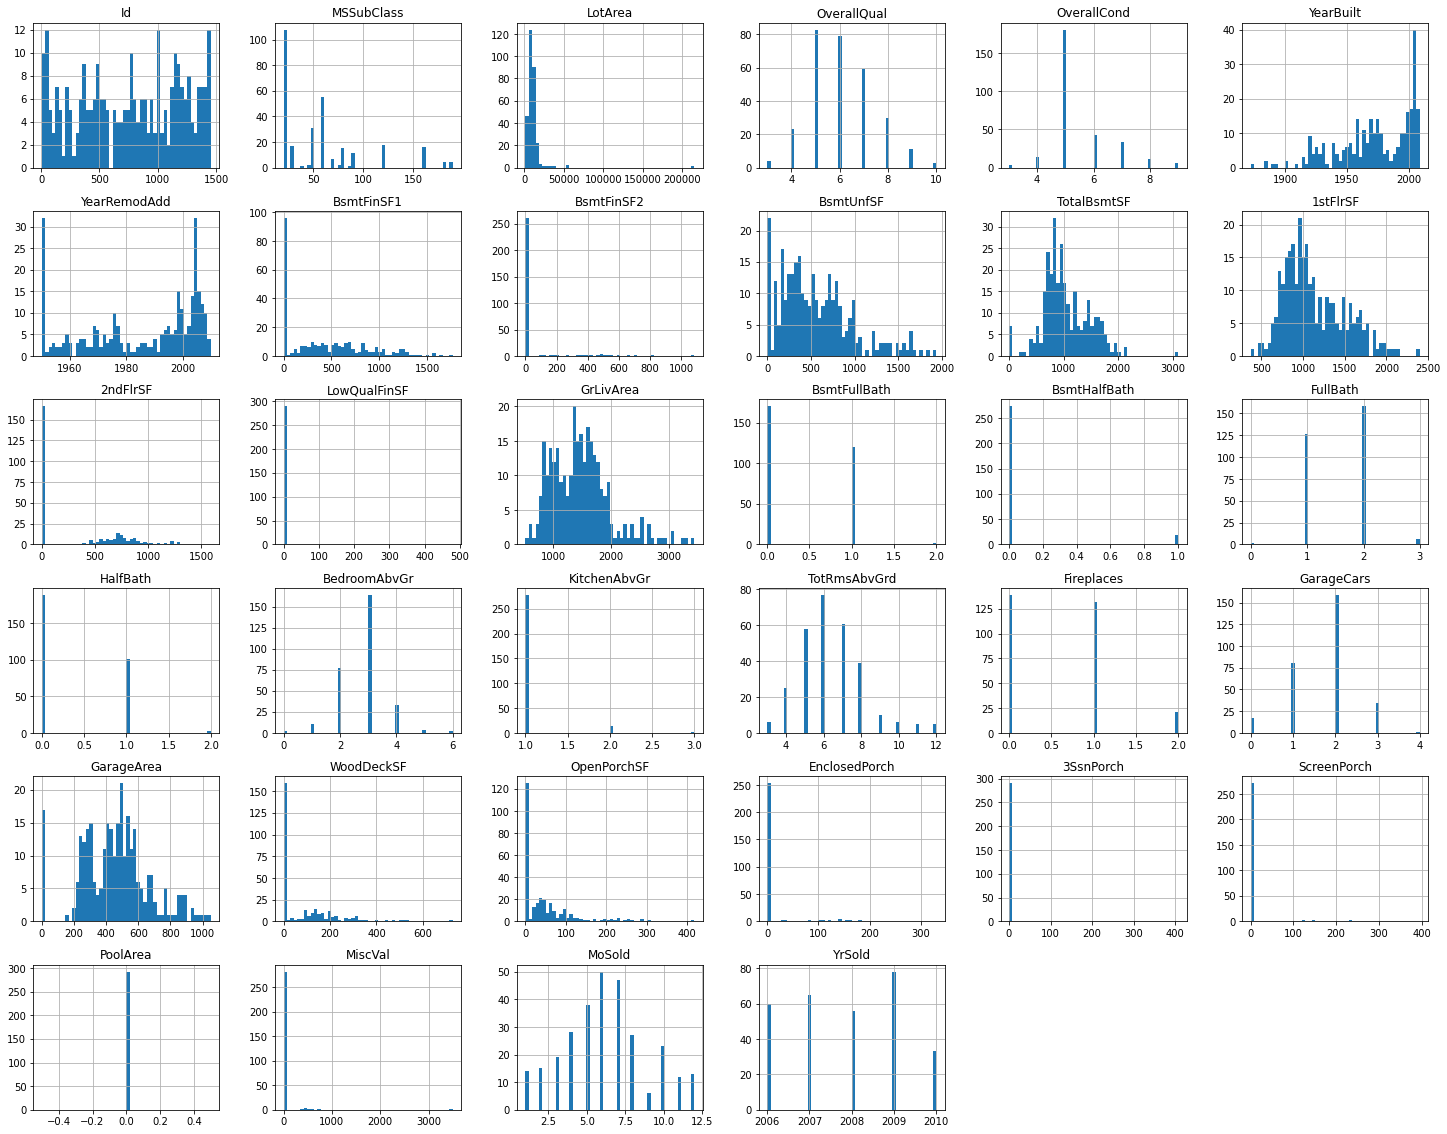

In [29]:
df.hist(bins=50,figsize=(25,20))

In [30]:
df['MSSubClass'].value_counts()

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64

array([[<AxesSubplot:title={'center':'LowQualFinSF'}>]], dtype=object)

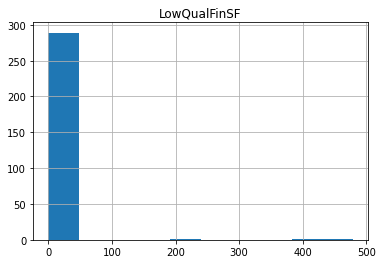

In [31]:
df.hist('LowQualFinSF')

In [32]:
df.drop('LowQualFinSF', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'KitchenAbvGr'}>]], dtype=object)

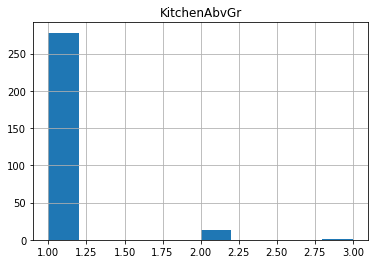

In [33]:
df.hist('KitchenAbvGr')

In [34]:
df.drop('KitchenAbvGr', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'HalfBath'}>]], dtype=object)

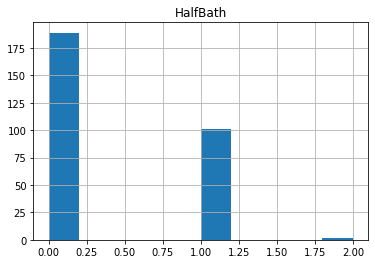

In [35]:
df.hist('HalfBath')

In [36]:
df['HalfBath'].value_counts()

0    189
1    101
2      2
Name: HalfBath, dtype: int64

array([[<AxesSubplot:title={'center':'BsmtFinSF2'}>]], dtype=object)

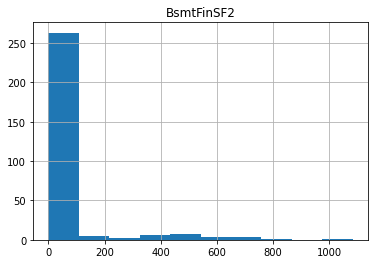

In [37]:
df.hist('BsmtFinSF2')

In [38]:
df.drop('BsmtFinSF2', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,

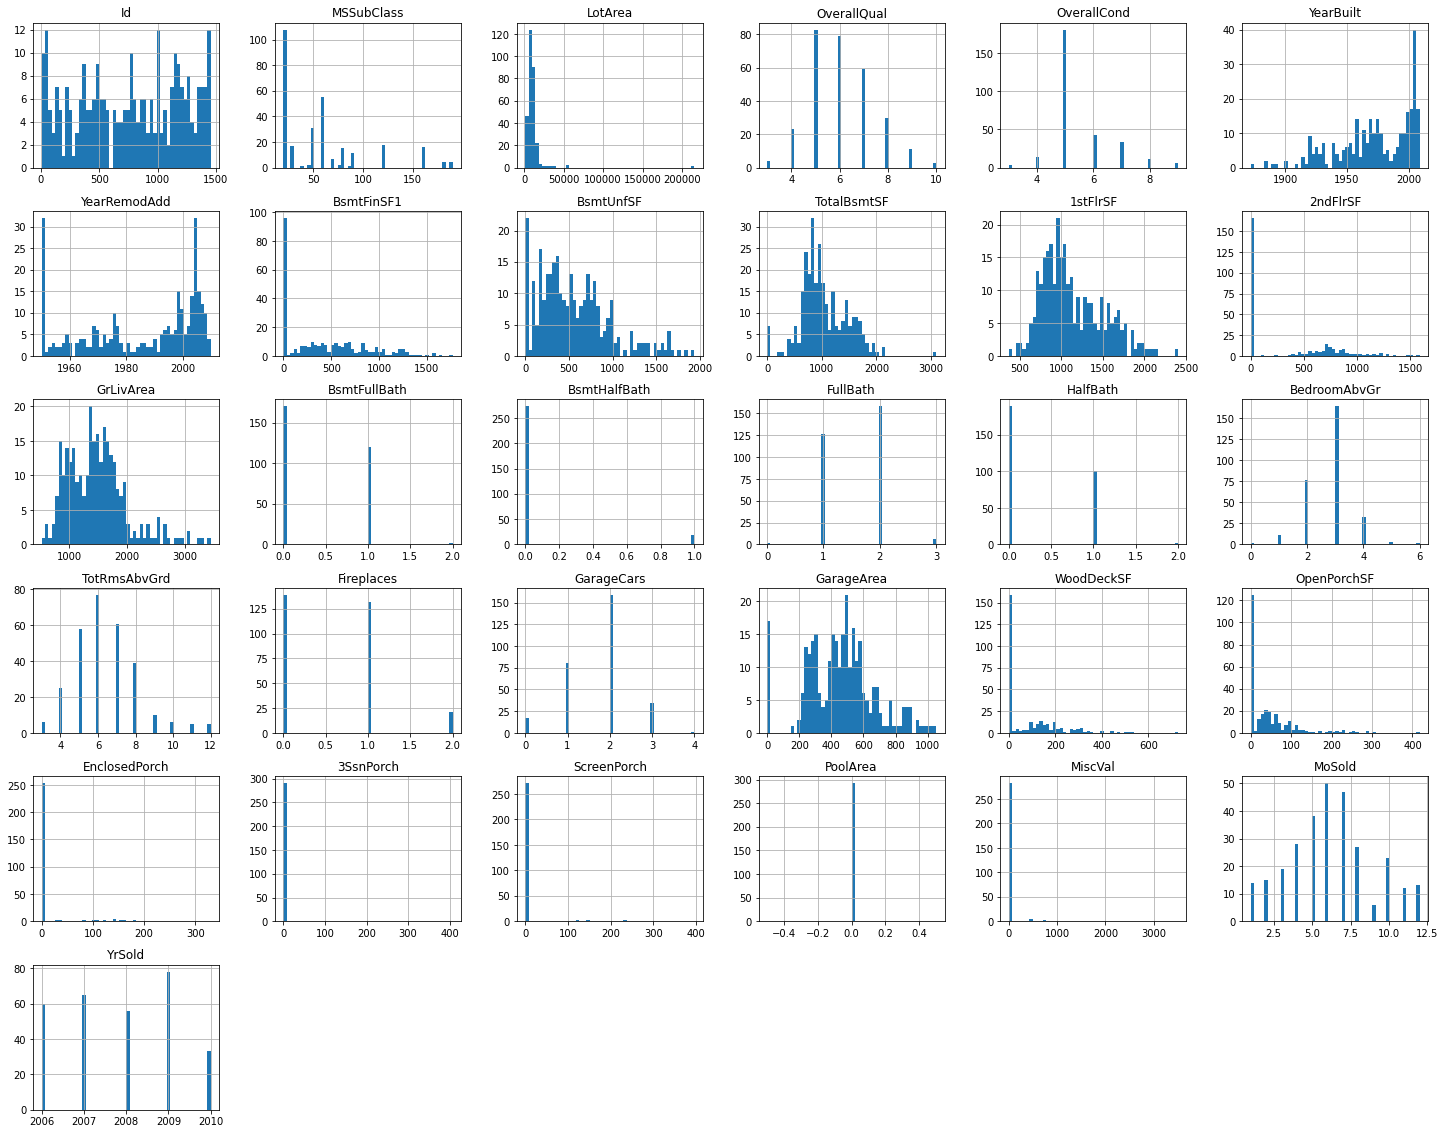

In [39]:
df.hist(bins=50,figsize=(25,20))

array([[<AxesSubplot:title={'center':'BsmtHalfBath'}>]], dtype=object)

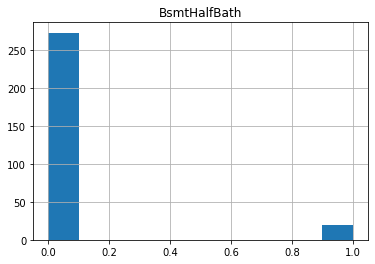

In [40]:
df.hist('BsmtHalfBath')

In [41]:
df.drop('BsmtHalfBath', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'EnclosedPorch'}>]], dtype=object)

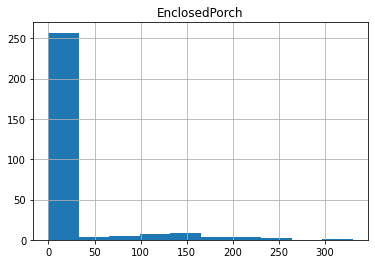

In [42]:
df.hist('EnclosedPorch')

In [43]:
df.drop('EnclosedPorch', inplace=True, axis=1)

In [44]:
df.drop('3SsnPorch', inplace=True, axis=1)

In [45]:
df.drop('ScreenPorch', inplace=True, axis=1)

In [46]:
df.drop('PoolArea', inplace=True, axis=1)

In [47]:
df.drop('MiscVal', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'2ndFlrSF'}>]], dtype=object)

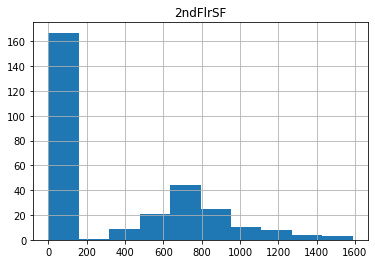

In [48]:
df.hist('2ndFlrSF')

In [49]:
df.drop('2ndFlrSF', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,

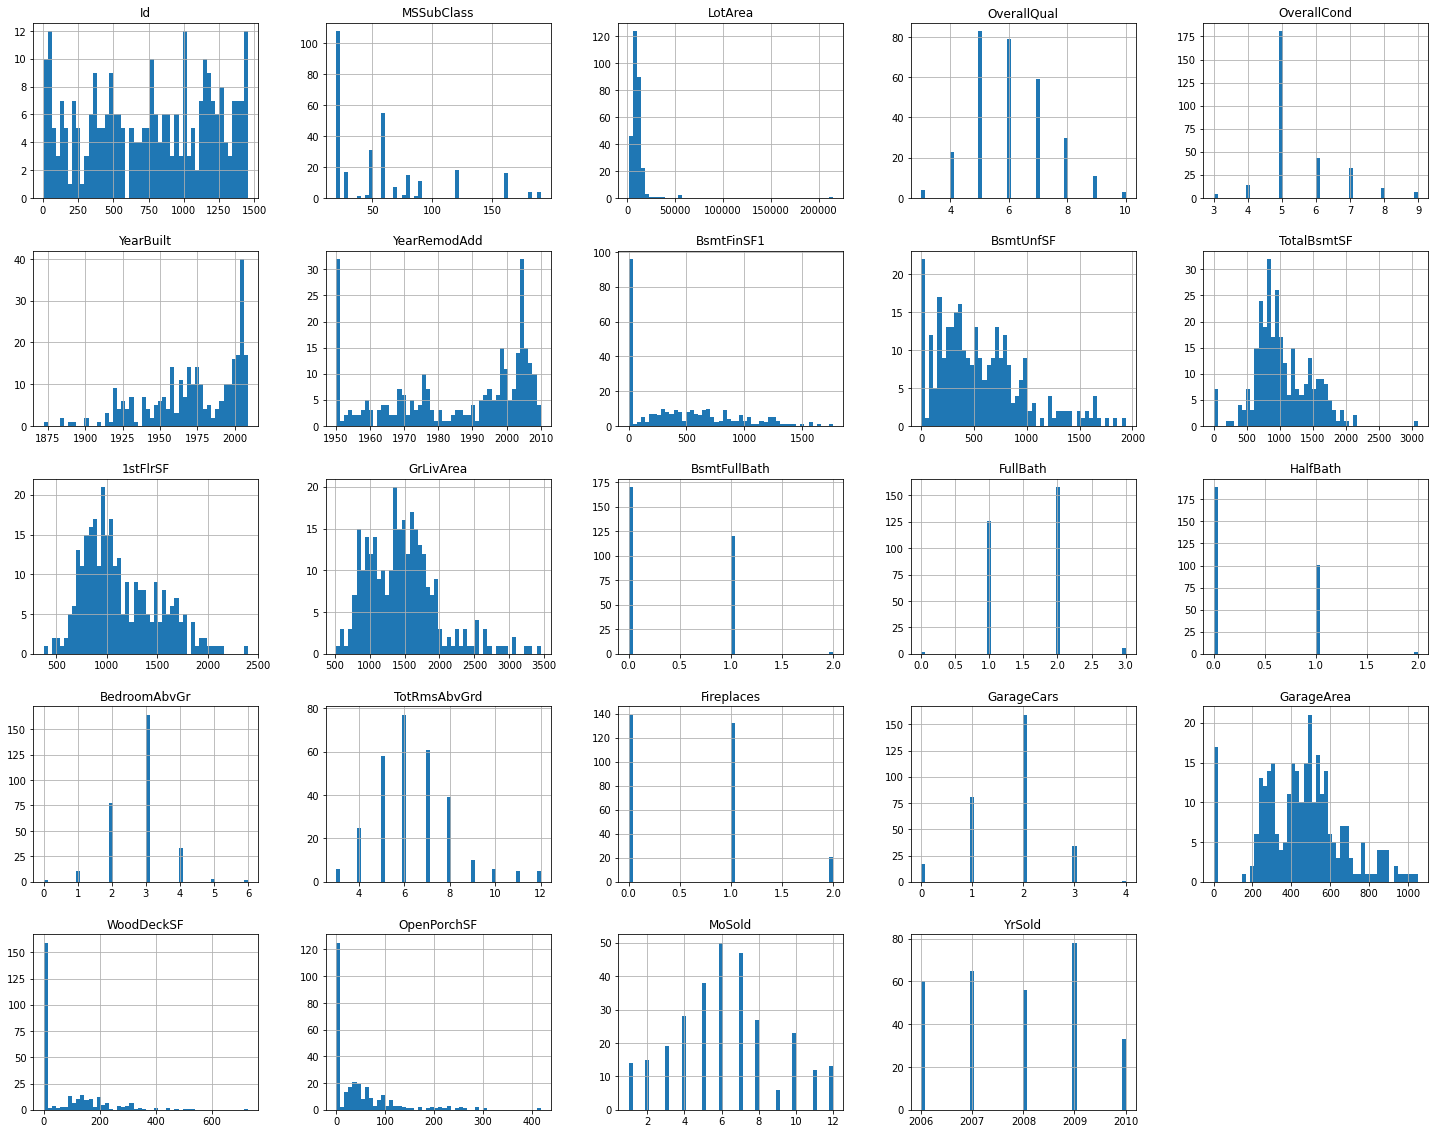

In [50]:
df.hist(bins=50,figsize=(25,20))

In [51]:
df.drop('Fireplaces', inplace=True, axis=1)

In [52]:
df['WoodDeckSF'].value_counts()

0      158
100     10
192     10
168      8
120      6
      ... 
228      1
238      1
270      1
276      1
156      1
Name: WoodDeckSF, Length: 87, dtype: int64

In [53]:
df.drop('WoodDeckSF', inplace=True, axis=1)

In [54]:
df['OpenPorchSF'].value_counts()

0      125
45       6
35       5
40       5
30       5
      ... 
58       1
128      1
55       1
52       1
418      1
Name: OpenPorchSF, Length: 92, dtype: int64

In [55]:
df.drop('OpenPorchSF', inplace=True, axis=1)

In [56]:
df['LotArea'].value_counts()

7200     7
1680     4
7500     3
5400     3
8450     3
        ..
10335    1
14157    1
7599     1
8520     1
12800    1
Name: LotArea, Length: 249, dtype: int64

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

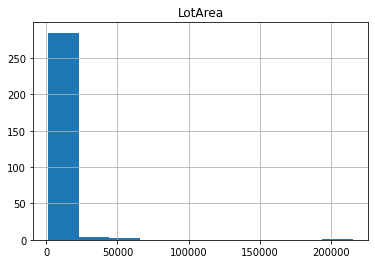

In [57]:
df.hist('LotArea')

In [58]:
df.drop('LotArea', inplace=True, axis=1)

In [59]:
df['HalfBath'].value_counts()

0    189
1    101
2      2
Name: HalfBath, dtype: int64

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>],
       [<AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'MoSold'}>,

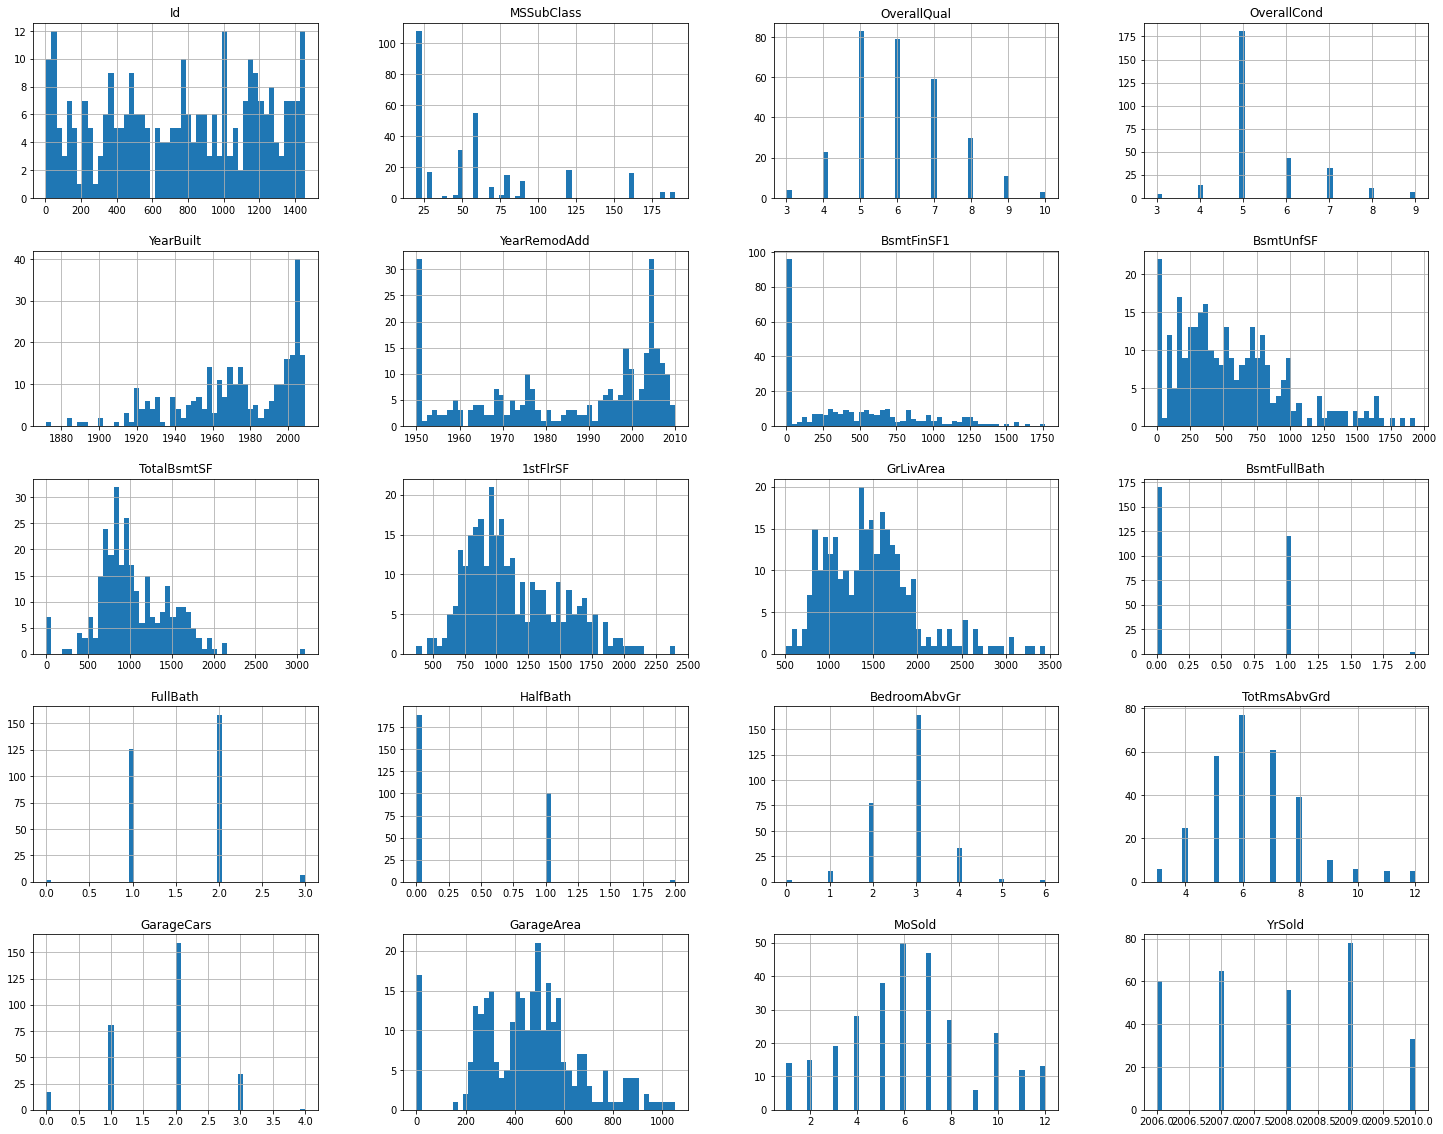

In [60]:
df.hist(bins=50,figsize=(25,20))

In [61]:
df['MoSold'].value_counts()

6     50
7     47
5     38
4     28
8     27
10    23
3     19
2     15
1     14
12    13
11    12
9      6
Name: MoSold, dtype: int64

array([[<AxesSubplot:title={'center':'MoSold'}>]], dtype=object)

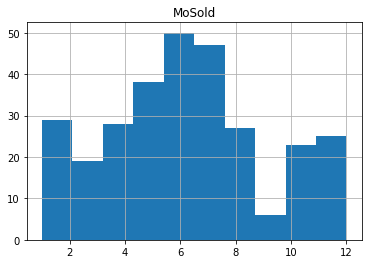

In [62]:
df.hist('MoSold')

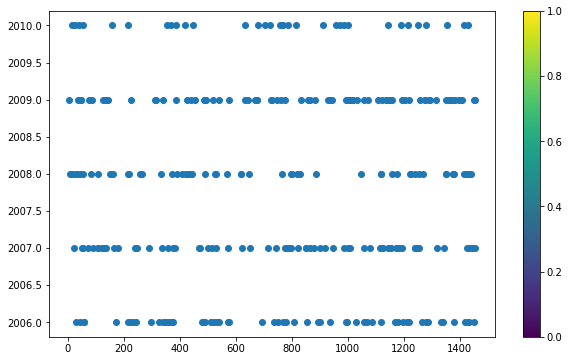

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['YrSold'])
plt.colorbar()

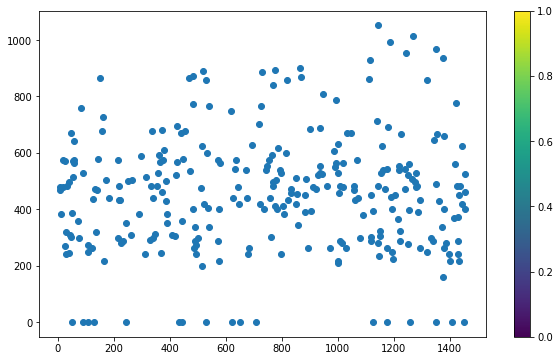

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['GarageArea'])
plt.colorbar()

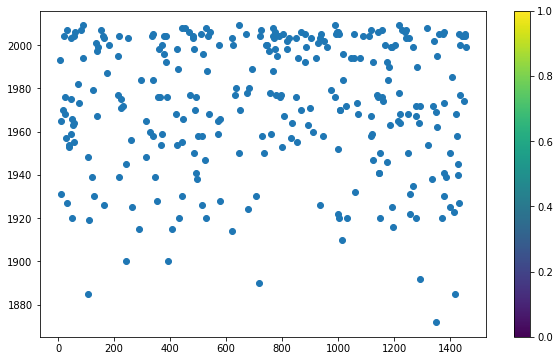

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['YearBuilt'])
plt.colorbar()

In [67]:
df.describe()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,755.955479,57.414384,6.078767,5.493151,1972.616438,1985.294521,439.294521,557.315068,1042.767123,1133.691781,1477.051370,0.424658,1.575342,0.359589,2.794521,6.417808,1.729452,457.458904,6.232877,2007.859589
std,442.565228,43.780649,1.356147,1.063267,30.447016,20.105792,429.559675,411.043768,424.561153,366.941919,514.199429,0.508831,0.547856,0.494795,0.807336,1.728105,0.754430,210.785591,2.774556,1.322867
min,6.000000,20.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,372.000000,520.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,255.000000,771.750000,858.000000,1061.500000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,300.000000,4.000000,2007.000000
50%,778.000000,50.000000,6.000000,5.000000,1976.000000,1994.000000,369.500000,487.000000,971.000000,1047.500000,1440.000000,0.000000,2.000000,0.000000,3.000000,6.000000,2.000000,467.500000,6.000000,2008.000000
75%,1152.250000,70.000000,7.000000,6.000000,2001.000000,2003.250000,700.500000,780.000000,1322.000000,1370.500000,1720.250000,1.000000,2.000000,1.000000,3.000000,7.000000,2.000000,569.750000,8.000000,2009.000000
max,1456.000000,190.000000,10.000000,9.000000,2009.000000,2010.000000,1767.000000,1935.000000,3094.000000,2402.000000,3447.000000,2.000000,3.000000,2.000000,6.000000,12.000000,4.000000,1052.000000,12.000000,2010.000000


In [68]:
corr_matrix=df.corr()

In [69]:
corr_matrix['Id'].sort_values(ascending=False)

Id              1.000000
BedroomAbvGr    0.152676
HalfBath        0.146049
GrLivArea       0.139969
TotRmsAbvGrd    0.132171
FullBath        0.083174
GarageCars      0.053864
GarageArea      0.052191
BsmtUnfSF       0.041345
MSSubClass      0.035247
YrSold          0.034579
1stFlrSF        0.019726
MoSold          0.015132
OverallQual     0.005823
YearBuilt      -0.000174
TotalBsmtSF    -0.019326
YearRemodAdd   -0.036955
BsmtFinSF1     -0.040462
BsmtFullBath   -0.077773
OverallCond    -0.089945
Name: Id, dtype: float64

In [70]:
corr_matrix['MSSubClass'].sort_values(ascending=False)

MSSubClass      1.000000
HalfBath        0.213601
FullBath        0.095903
YrSold          0.044441
YearBuilt       0.041932
Id              0.035247
GrLivArea       0.030615
TotRmsAbvGrd    0.002973
BsmtFullBath   -0.000676
MoSold         -0.004079
YearRemodAdd   -0.023317
BedroomAbvGr   -0.061750
OverallCond    -0.068113
GarageCars     -0.086798
OverallQual    -0.116077
GarageArea     -0.122536
BsmtFinSF1     -0.142908
BsmtUnfSF      -0.169129
TotalBsmtSF    -0.336822
1stFlrSF       -0.350270
Name: MSSubClass, dtype: float64

In [71]:
corr_matrix['BedroomAbvGr'].sort_values(ascending=False)    

BedroomAbvGr    1.000000
TotRmsAbvGrd    0.692301
GrLivArea       0.567402
FullBath        0.392513
HalfBath        0.340449
BsmtUnfSF       0.212273
1stFlrSF        0.211206
GarageArea      0.209195
GarageCars      0.190515
Id              0.152676
OverallQual     0.108994
TotalBsmtSF     0.107004
YearBuilt      -0.026005
MoSold         -0.027656
YrSold         -0.030325
YearRemodAdd   -0.058289
OverallCond    -0.061694
MSSubClass     -0.061750
BsmtFinSF1     -0.076283
BsmtFullBath   -0.154929
Name: BedroomAbvGr, dtype: float64

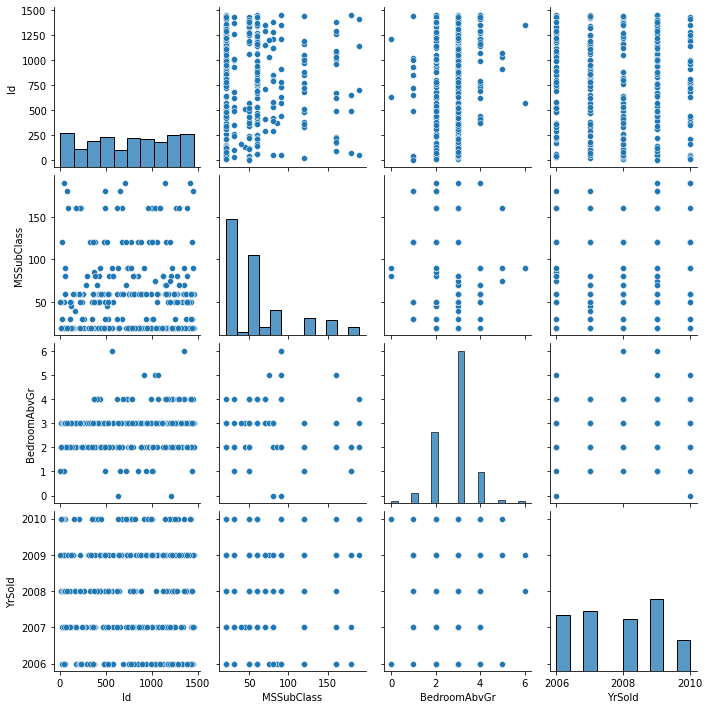

In [74]:
sns.pairplot(df[['Id','MSSubClass','BedroomAbvGr','YrSold']])

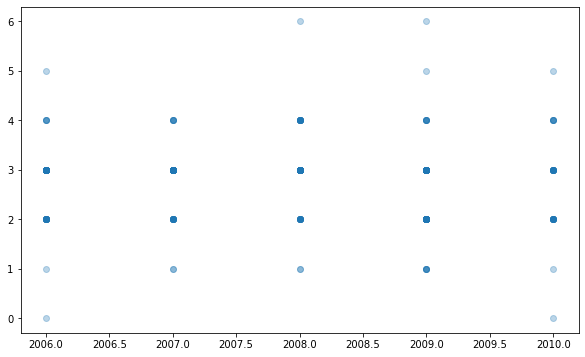

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['BedroomAbvGr'],x=df['YrSold'],alpha=0.3)

In [76]:
df.drop_duplicates(inplace = True)

In [77]:
df.shape

(292, 49)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             292 non-null    int64 
 1   MSSubClass     292 non-null    int64 
 2   MSZoning       292 non-null    object
 3   Street         292 non-null    object
 4   LotShape       292 non-null    object
 5   LandContour    292 non-null    object
 6   Utilities      292 non-null    object
 7   LotConfig      292 non-null    object
 8   LandSlope      292 non-null    object
 9   Neighborhood   292 non-null    object
 10  Condition1     292 non-null    object
 11  Condition2     292 non-null    object
 12  BldgType       292 non-null    object
 13  HouseStyle     292 non-null    object
 14  OverallQual    292 non-null    int64 
 15  OverallCond    292 non-null    int64 
 16  YearBuilt      292 non-null    int64 
 17  YearRemodAdd   292 non-null    int64 
 18  RoofStyle      292 non-null   

In [80]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(df[["BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","GarageCars","GarageArea"]],df.YrSold,test_size=0.3,random_state=42)

In [81]:
len(x_train)

204

In [82]:
len(x_test)

88

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [85]:
linreg.intercept_

2007.9272834941664

In [86]:
linreg.coef_

array([ 0.40020214,  0.19933792,  0.23467591, -0.1738115 ,  0.05698552,
       -0.00040324])

In [87]:
list(zip(["BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","GarageCars","GarageArea"], list(linreg.coef_)))

[('BsmtFullBath', 0.40020214031635),
 ('FullBath', 0.19933792171584092),
 ('HalfBath', 0.23467590868818702),
 ('BedroomAbvGr', -0.17381149701712015),
 ('GarageCars', 0.05698551752051132),
 ('GarageArea', -0.0004032426201448225)]

In [88]:
y_pred=linreg.predict(x_test)

In [89]:
test_pred_df= pd.DataFrame({'actual':y_test,
                           'predicted':np.round(y_pred, 2),
                           'residuals':y_test - y_pred})

test_pred_df.sample(10)

,actual,predicted,residuals
16,2009,2008.01,0.994611
84,2007,2007.95,-0.946712
274,2007,2008.05,-1.049864
278,2009,2008.08,0.918163
33,2008,2008.17,-0.169351
19,2006,2008.29,-2.289275
147,2009,2007.70,1.300312
231,2007,2007.90,-0.902012
143,2006,2008.15,-2.151017
114,2006,2007.95,-1.950897


In [90]:
from sklearn import metrics

In [91]:
r2=metrics.r2_score(y_train,linreg.predict(x_train))
print("R squared:", r2)

R squared: 0.03748543941531168


In [92]:
mse= metrics.mean_squared_error(y_test,y_pred)

In [93]:
rmse=round(np.sqrt(mse),2)
print("RMSE:",rmse)

RMSE: 1.37


In [94]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train,y_train)

In [95]:
print(classifier.predict(x_train))
print(y_train.values)

[2009 2007 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2007 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2007 2009 2009
 2009 2009 2009 2009 2009 2007 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2007 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2007 2009 2009 2009 2009 2009 2009
 2009 2009 2007 2009 2009 2009 2009 2007 2009 2009 2009 2009 2007 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2007
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2007 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 

In [97]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
pred=classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print('confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ',accuracy_score(y_train,pred))

              precision    recall  f1-score   support

        2006       0.00      0.00      0.00        40
        2007       0.45      0.12      0.19        43
        2008       0.00      0.00      0.00        34
        2009       0.33      0.98      0.50        65
        2010       0.00      0.00      0.00        22

    accuracy                           0.34       204
   macro avg       0.16      0.22      0.14       204
weighted avg       0.20      0.34      0.20       204


confusion Matrix: 
 [[ 0  1  0 39  0]
 [ 0  5  0 38  0]
 [ 0  3  0 31  0]
 [ 0  1  0 64  0]
 [ 0  1  0 21  0]]

Accuracy:  0.3382352941176471


c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera